# **Explore and Cluster the Neighborhoods in Toronto**

# __**Part-1**__:  **Creating the DataFrame**

In [1]:
pip install beautifulsoup4

     |████████████████████████████████| 112kB 6.9MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install lxml

     |████████████████████████████████| 5.8MB 28.5MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [2]:
from bs4 import BeautifulSoup
import requests
import pandas as pd

In [3]:
source = requests.get("https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M").text
soup = BeautifulSoup(source, 'lxml')

In [4]:
table = soup.find("table")
table

<table class="wikitable sortable">
<tbody><tr>
<th>Postcode</th>
<th>Borough</th>
<th>Neighbourhood
</th></tr>
<tr>
<td>M1A</td>
<td>Not assigned</td>
<td>Not assigned
</td></tr>
<tr>
<td>M2A</td>
<td>Not assigned</td>
<td>Not assigned
</td></tr>
<tr>
<td>M3A</td>
<td><a href="/wiki/North_York" title="North York">North York</a></td>
<td><a href="/wiki/Parkwoods" title="Parkwoods">Parkwoods</a>
</td></tr>
<tr>
<td>M4A</td>
<td><a href="/wiki/North_York" title="North York">North York</a></td>
<td><a href="/wiki/Victoria_Village" title="Victoria Village">Victoria Village</a>
</td></tr>
<tr>
<td>M5A</td>
<td><a href="/wiki/Downtown_Toronto" title="Downtown Toronto">Downtown Toronto</a></td>
<td><a href="/wiki/Regent_Park" title="Regent Park">Harbourfront</a>
</td></tr>
<tr>
<td>M6A</td>
<td><a href="/wiki/North_York" title="North York">North York</a></td>
<td><a href="/wiki/Lawrence_Heights" title="Lawrence Heights">Lawrence Heights</a>
</td></tr>
<tr>
<td>M6A</td>
<td><a href="/wiki/North

In [8]:
# No need

# post = table.tbody.tr.th.text
# post

'Postcode'

In [5]:
table = soup.find('table', class_="wikitable sortable")
table_rows = table.find_all('tr')

table_rows

[<tr>
 <th>Postcode</th>
 <th>Borough</th>
 <th>Neighbourhood
 </th></tr>, <tr>
 <td>M1A</td>
 <td>Not assigned</td>
 <td>Not assigned
 </td></tr>, <tr>
 <td>M2A</td>
 <td>Not assigned</td>
 <td>Not assigned
 </td></tr>, <tr>
 <td>M3A</td>
 <td><a href="/wiki/North_York" title="North York">North York</a></td>
 <td><a href="/wiki/Parkwoods" title="Parkwoods">Parkwoods</a>
 </td></tr>, <tr>
 <td>M4A</td>
 <td><a href="/wiki/North_York" title="North York">North York</a></td>
 <td><a href="/wiki/Victoria_Village" title="Victoria Village">Victoria Village</a>
 </td></tr>, <tr>
 <td>M5A</td>
 <td><a href="/wiki/Downtown_Toronto" title="Downtown Toronto">Downtown Toronto</a></td>
 <td><a href="/wiki/Regent_Park" title="Regent Park">Harbourfront</a>
 </td></tr>, <tr>
 <td>M6A</td>
 <td><a href="/wiki/North_York" title="North York">North York</a></td>
 <td><a href="/wiki/Lawrence_Heights" title="Lawrence Heights">Lawrence Heights</a>
 </td></tr>, <tr>
 <td>M6A</td>
 <td><a href="/wiki/North_Yor

In [6]:
all = []
for tr in table_rows:
    td = tr.find_all('td')
    row = [tr.text.strip() for tr in td if tr.text.strip()]
    if row:
        all.append(row)
    
frame = pd.DataFrame(all, columns=["Postcode", "Borough", "Neighbourhood"])
frame.head()

,Postcode,Borough,Neighbourhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Harbourfront


In [7]:
frame.shape

(287, 3)

In [8]:
Tor_frame = frame.copy()
Tor_frame.head()

,Postcode,Borough,Neighbourhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Harbourfront


In [9]:
Tor_frame.shape

(287, 3)

In [10]:
Tor_frame[Tor_frame["Borough"]=="Not assigned"].shape

(77, 3)

In [11]:
Tor_frame[Tor_frame["Neighbourhood"]=="Not assigned"].shape

(78, 3)

**So I can see that, Neighbourhood has got an extra Not Assigned, but I'll follow the instruction anyway, i.e. only for Borough**

In [12]:
Tor_frame = Tor_frame[Tor_frame["Borough"]!="Not assigned"].reset_index(drop=True)
# Tor_frame = Tor_frame[Tor_frame["Neighbourhood"]!="Not assigned"].reset_index(drop=True)
Tor_frame.head(5)


,Postcode,Borough,Neighbourhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,Harbourfront
3,M6A,North York,Lawrence Heights
4,M6A,North York,Lawrence Manor


In [43]:
###### No Need bcoz I've used ".reset_index(drop=True)"

# Tor_frame=Tor_frame.drop(["index"], axis = 1)
# Tor_frame.head()

,Postcode,Borough,Neighbourhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,Harbourfront
3,M6A,North York,Lawrence Heights
4,M6A,North York,Lawrence Manor


In [13]:
Tor_frame=Tor_frame.rename(columns={"Postcode":"PostalCode"})
Tor_frame.head()

,PostalCode,Borough,Neighbourhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,Harbourfront
3,M6A,North York,Lawrence Heights
4,M6A,North York,Lawrence Manor


In [14]:
print(len(Tor_frame["PostalCode"]))
print(len(Tor_frame["PostalCode"].unique()))

210
103


In [15]:
Tor_frame1 = Tor_frame.groupby(["PostalCode", "Borough"])["Neighbourhood"].apply(",".join).reset_index()
Tor_frame1.head(10)

,PostalCode,Borough,Neighbourhood
0,M1B,Scarborough,"Rouge,Malvern"
1,M1C,Scarborough,"Highland Creek,Rouge Hill,Port Union"
2,M1E,Scarborough,"Guildwood,Morningside,West Hill"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae
5,M1J,Scarborough,Scarborough Village
6,M1K,Scarborough,"East Birchmount Park,Ionview,Kennedy Park"
7,M1L,Scarborough,"Clairlea,Golden Mile,Oakridge"
8,M1M,Scarborough,"Cliffcrest,Cliffside,Scarborough Village West"
9,M1N,Scarborough,"Birch Cliff,Cliffside West"


In [16]:
##   For Verification

Tor_frame1[Tor_frame1["PostalCode"]=="M1R"]

,PostalCode,Borough,Neighbourhood
11,M1R,Scarborough,"Maryvale,Wexford"


In [17]:
Tor_frame1.shape

(103, 3)

# **DataFrame Prepared -----** **End of Part 1**

---------------------------------------------------------------------------------------------------------------------------------

# **Part-2** : **Preparation of DataFrame from Part 1 along with Latitude and Longitude**

In [19]:
!conda install -c conda-forge geopy --yes

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.11
  latest version: 4.8.1

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2019.11.28         |           py36_0         149 KB  conda-forge
    scikit-learn-0.20.1        |   py36h22eb022_0         5.7 MB
    liblapack-3.8.0            |      11_openblas          10 KB  conda-forge
    liblapacke-3.8.0           |      11_openblas          10 KB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    libopenblas-0.3.6          |       h5a2b251_2         7.7 MB
    scipy-1.4.1                |   py36h921218d_0        18.9 MB  conda-forge
    lib

In [22]:
!pip -q install geocoder

In [18]:
import geocoder # import geocoder

In [19]:
ltln=pd.read_csv("http://cocl.us/Geospatial_data")
ltln.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [ ]:
# initialize your variable to None

## Start with this later.....................

# lat_lng_coords = None
# postal_code = Tor_frame1["PostalCode"].tolist()

# # loop until you get the coordinates
# while(lat_lng_coords is None):
#   g = geocoder.google('{}, Toronto, Ontario'.format(postal_code))
#   lat_lng_coords = g.latlng

# latitude = lat_lng_coords[0]
# longitude = lat_lng_coords[1]

Status code Unknown from https://maps.googleapis.com/maps/api/geocode/json: ERROR - HTTPSConnectionPool(host='maps.googleapis.com', port=443): Read timed out. (read timeout=5.0)


In [20]:
ltln.shape

(103, 3)

In [21]:
ltln.rename(columns={"Postal Code":"PostalCode"}, inplace=True)
ltln.head()

,PostalCode,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [22]:
Geo_frame = pd.merge(ltln, Tor_frame1, on="PostalCode")
Geo_frame.head()

,PostalCode,Latitude,Longitude,Borough,Neighbourhood
0,M1B,43.806686,-79.194353,Scarborough,"Rouge,Malvern"
1,M1C,43.784535,-79.160497,Scarborough,"Highland Creek,Rouge Hill,Port Union"
2,M1E,43.763573,-79.188711,Scarborough,"Guildwood,Morningside,West Hill"
3,M1G,43.770992,-79.216917,Scarborough,Woburn
4,M1H,43.773136,-79.239476,Scarborough,Cedarbrae


In [22]:
Geo_frame.to_csv("Geo_frame.csv")

# **DataFrame Prepared with Latitude and Longitude -----** **End of Part 2**


---------------------------------------------------------------------------------------------------------------------
     

# **Part-3** : **Explore and Cluster the Neighbourhood of Toronto**

In [23]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if I didn't install previously
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if I didn't install previously
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


In [24]:
#To filter_out Toronto in Borough Column

New_Geo_frame = Geo_frame[Geo_frame.Borough.str.contains('Toronto')]
New_Geo_frame.head(8)

,PostalCode,Latitude,Longitude,Borough,Neighbourhood
37,M4E,43.676357,-79.293031,East Toronto,The Beaches
41,M4K,43.679557,-79.352188,East Toronto,"The Danforth West,Riverdale"
42,M4L,43.668999,-79.315572,East Toronto,"The Beaches West,India Bazaar"
43,M4M,43.659526,-79.340923,East Toronto,Studio District
44,M4N,43.728020,-79.388790,Central Toronto,Lawrence Park
45,M4P,43.712751,-79.390197,Central Toronto,Davisville North
46,M4R,43.715383,-79.405678,Central Toronto,North Toronto West
47,M4S,43.704324,-79.388790,Central Toronto,Davisville


In [25]:
New_Geo_frame.shape

(39, 5)

In [26]:
New_Geo_frame.Borough.value_counts()

Downtown Toronto    19
Central Toronto      9
West Toronto         6
East Toronto         5
Name: Borough, dtype: int64

In [27]:
address = str(input("Enter the Address:"))
# Toronto, Canada
geolocator = Nominatim(user_agent="Toronto_explore")
location = geolocator.geocode(address)

latitude = location.latitude
longitude = location.longitude

print("The lat and lng of:"+ address +" is {}, {}.".format(latitude, longitude))

Enter the Address: Toronto, Canada


The lat and lng of:Toronto, Canada is 43.653963, -79.387207.


### **Map Creation**

In [28]:
# create map of New York using latitude and longitude values
Toronto_map = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighbourhood in zip(New_Geo_frame['Latitude'], New_Geo_frame['Longitude'], New_Geo_frame['Borough'], New_Geo_frame['Neighbourhood']):
    label = '{}, {}'.format(neighbourhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(Toronto_map)  
    
Toronto_map

In [29]:
# The code was removed by Watson Studio for sharing.

Hidden Crentials


{'tags': ['hide_output']}

 **The above hidden cell contains:**

CLIENT_ID = '*************' # your Foursquare ID

CLIENT_SECRET = '**************' # your Foursquare Secret

VERSION = '20180605'

In [30]:
New_Geo_frame.tail(10)

,PostalCode,Latitude,Longitude,Borough,Neighbourhood
70,M5X,43.648429,-79.382280,Downtown Toronto,"First Canadian Place,Underground city"
75,M6G,43.669542,-79.422564,Downtown Toronto,Christie
76,M6H,43.669005,-79.442259,West Toronto,"Dovercourt Village,Dufferin"
77,M6J,43.647927,-79.419750,West Toronto,"Little Portugal,Trinity"
78,M6K,43.636847,-79.428191,West Toronto,"Brockton,Exhibition Place,Parkdale Village"
82,M6P,43.661608,-79.464763,West Toronto,"High Park,The Junction South"
83,M6R,43.648960,-79.456325,West Toronto,"Parkdale,Roncesvalles"
84,M6S,43.651571,-79.484450,West Toronto,"Runnymede,Swansea"
85,M7A,43.662301,-79.389494,Downtown Toronto,Queen's Park
87,M7Y,43.662744,-79.321558,East Toronto,Business Reply Mail Processing Centre 969 Eastern


### **Now, I'm interested in Downtown Toronto**

In [31]:
TorDownT_df = New_Geo_frame[New_Geo_frame["Borough"]=="Downtown Toronto"].reset_index(drop=True)
TorDownT_df

,PostalCode,Latitude,Longitude,Borough,Neighbourhood
0,M4W,43.679563,-79.377529,Downtown Toronto,Rosedale
1,M4X,43.667967,-79.367675,Downtown Toronto,"Cabbagetown,St. James Town"
2,M4Y,43.665860,-79.383160,Downtown Toronto,Church and Wellesley
3,M5A,43.654260,-79.360636,Downtown Toronto,Harbourfront
4,M5B,43.657162,-79.378937,Downtown Toronto,"Ryerson,Garden District"
5,M5C,43.651494,-79.375418,Downtown Toronto,St. James Town
6,M5E,43.644771,-79.373306,Downtown Toronto,Berczy Park
7,M5G,43.657952,-79.387383,Downtown Toronto,Central Bay Street
8,M5H,43.650571,-79.384568,Downtown Toronto,"Adelaide,King,Richmond"
9,M5J,43.640816,-79.381752,Downtown Toronto,"Harbourfront East,Toronto Islands,Union Station"


#### **Looks like Queen's Park has got my interest**

In [32]:
New_Geo_frame.loc[85, "Neighbourhood"]

"Queen's Park"

In [33]:
TorDownT_df.loc[18, "Neighbourhood"]

"Queen's Park"

In [34]:
QnPrk_lat = TorDownT_df.loc[18, "Latitude"]
QnPrk_lng = TorDownT_df.loc[18, "Longitude"]
QnPrk_name = TorDownT_df.loc[18, "Neighbourhood"]

print("Lat and Lng of {} is {}, {}.".format(QnPrk_name, QnPrk_lat, QnPrk_lng))

Lat and Lng of Queen's Park is 43.6623015, -79.3894938.


### **Getting top 100 venues within 500 m radius of Queen's Park**

In [35]:
LIMIT = 100
radius = 500

url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, QnPrk_lat, QnPrk_lng, VERSION, radius, LIMIT)


In [36]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5e36aae7618f43001b9c913d'},
 'response': {'headerLocation': 'Bay Street Corridor',
  'headerFullLocation': 'Bay Street Corridor, Toronto',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 39,
  'suggestedBounds': {'ne': {'lat': 43.6668015045, 'lng': -79.38328496866619},
   'sw': {'lat': 43.657801495499996, 'lng': -79.3957026313338}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4b9d206bf964a520e69136e3',
       'name': "Queen's Park",
       'location': {'address': 'University Ave.',
        'crossStreet': 'at Wellesley Ave.',
        'lat': 43.66394609897775,
        'lng': -79.39217952520835,
        'labeledLatLngs': [{'label': 'display',
          'lat': 43.66394609897775,
          'lng': -79.39217952520835}],


In [37]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [38]:
venues = results['response']['groups'][0]['items']
nearby_venues = json_normalize(venues) # flatten JSON
nearby_venues

,referralId,reasons.count,reasons.items,venue.id,venue.name,venue.location.address,venue.location.crossStreet,venue.location.lat,venue.location.lng,venue.location.labeledLatLngs,venue.location.distance,venue.location.postalCode,venue.location.cc,venue.location.city,venue.location.state,venue.location.country,venue.location.formattedAddress,venue.categories,venue.photos.count,venue.photos.groups,venue.venuePage.id
0,e-0-4b9d206bf964a520e69136e3-0,0,"[{'summary': 'This spot is popular', 'type': '...",4b9d206bf964a520e69136e3,Queen's Park,University Ave.,at Wellesley Ave.,43.663946,-79.392180,"[{'label': 'display', 'lat': 43.66394609897775...",283,M5R 2E8,CA,Toronto,ON,Canada,"[University Ave. (at Wellesley Ave.), Toronto ...","[{'id': '4bf58dd8d48988d163941735', 'name': 'P...",0,[],NaN
1,e-0-52d884c5498ecf5c7cafe5ab-1,0,"[{'summary': 'This spot is popular', 'type': '...",52d884c5498ecf5c7cafe5ab,Nando's,832 Bay St,Grenville St,43.661728,-79.386391,"[{'label': 'display', 'lat': 43.66172826, 'lng...",257,M5S 1Z6,CA,Toronto,ON,Canada,"[832 Bay St (Grenville St), Toronto ON M5S 1Z6...","[{'id': '4def73e84765ae376e57713a', 'name': 'P...",0,[],550386889
2,e-0-4a8355bff964a520d3fa1fe3-2,0,"[{'summary': 'This spot is popular', 'type': '...",4a8355bff964a520d3fa1fe3,Mercatto,101 College St,NaN,43.660391,-79.387664,"[{'label': 'display', 'lat': 43.66039091189854...",258,M5G,CA,Toronto,ON,Canada,"[101 College St, Toronto ON M5G, Canada]","[{'id': '4bf58dd8d48988d110941735', 'name': 'I...",0,[],NaN
3,e-0-4ad8d773f964a5203e1521e3-3,0,"[{'summary': 'This spot is popular', 'type': '...",4ad8d773f964a5203e1521e3,YMCA,20 Grosvenor St,btwn St. Vincent Ln & St. Lukes Ln,43.662753,-79.384849,"[{'label': 'display', 'lat': 43.66275344493089...",377,M4Y 1C2,CA,Toronto,ON,Canada,[20 Grosvenor St (btwn St. Vincent Ln & St. Lu...,"[{'id': '4bf58dd8d48988d176941735', 'name': 'G...",0,[],NaN
4,e-0-576d30ed498ef2e95e26e6d0-4,0,"[{'summary': 'This spot is popular', 'type': '...",576d30ed498ef2e95e26e6d0,Starbucks,101 College St,University Ave,43.659456,-79.390411,"[{'label': 'display', 'lat': 43.65945605353152...",325,M5G 1L7,CA,Toronto,ON,Canada,"[101 College St (University Ave), Toronto ON M...","[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",0,[],NaN
5,e-0-568bcf61498e3aaff5e351f8-5,0,"[{'summary': 'This spot is popular', 'type': '...",568bcf61498e3aaff5e351f8,Coffee Public,800 Bay St,at College St,43.660763,-79.386184,"[{'label': 'display', 'lat': 43.66076299149323...",316,M5S 3A9,CA,Toronto,ON,Canada,"[800 Bay St (at College St), Toronto ON M5S 3A...","[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",0,[],NaN
6,e-0-594ff53c2be42528bcc1bdb7-6,0,"[{'summary': 'This spot is popular', 'type': '...",594ff53c2be42528bcc1bdb7,T-Swirl Crepe,510 Yonge Street,NaN,43.663452,-79.384125,"[{'label': 'display', 'lat': 43.663452, 'lng':...",450,M4Y 1X9,CA,Toronto,ON,Canada,"[510 Yonge Street, Toronto ON M4Y 1X9, Canada]","[{'id': '52e81612bcbc57f1066b79f2', 'name': 'C...",0,[],455073193
7,e-0-4aeb5989f964a5203ec121e3-7,0,"[{'summary': 'This spot is popular', 'type': '...",4aeb5989f964a5203ec121e3,The Yoga Sanctuary,"2 College St. W, Suite 306",at Yonge St.,43.661499,-79.383636,"[{'label': 'display', 'lat': 43.66149949759759...",480,M5G 1K3,CA,Toronto,ON,Canada,"[2 College St. W, Suite 306 (at Yonge St.), To...","[{'id': '4bf58dd8d48988d102941735', 'name': 'Y...",0,[],NaN
8,e-0-4fb593c0e4b05a76e2ab2951-8,0,"[{'summary': 'This spot is popular', 'type': '...",4fb593c0e4b05a76e2ab2951,Como En Casa,565 Yonge St,NaN,43.665160,-79.384796,"[{'label': 'display', 'lat': 43.66516, 'lng': ...",494,M4Y-1Z2,CA,Toronto,ON,Canada,"[565 Yonge St, Toronto ON M4Y-1Z2, Canada]","[{'id': '4bf58dd8d48988d1c1941735', 'name': 'M...",0,[],NaN
9,e-0-4d927b8352ed224b27d008ac-9,0,"[{'summary': 'This spot is popular', 'type': '...",4d927b8352ed224b27d008ac,Burrito Bandidos,496 Yonge St.,at Grosvenor St.,43.662962,-79.383956,"[{'label': 'display', 'lat': 43.66296217816934...",452,M4Y 1X9,CA,T

In [39]:
venues

[{'reasons': {'count': 0,
   'items': [{'summary': 'This spot is popular',
     'type': 'general',
     'reasonName': 'globalInteractionReason'}]},
  'venue': {'id': '4b9d206bf964a520e69136e3',
   'name': "Queen's Park",
   'location': {'address': 'University Ave.',
    'crossStreet': 'at Wellesley Ave.',
    'lat': 43.66394609897775,
    'lng': -79.39217952520835,
    'labeledLatLngs': [{'label': 'display',
      'lat': 43.66394609897775,
      'lng': -79.39217952520835}],
    'distance': 283,
    'postalCode': 'M5R 2E8',
    'cc': 'CA',
    'city': 'Toronto',
    'state': 'ON',
    'country': 'Canada',
    'formattedAddress': ['University Ave. (at Wellesley Ave.)',
     'Toronto ON M5R 2E8',
     'Canada']},
   'categories': [{'id': '4bf58dd8d48988d163941735',
     'name': 'Park',
     'pluralName': 'Parks',
     'shortName': 'Park',
     'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/parks_outdoors/park_',
      'suffix': '.png'},
     'primary': True}],
   'photos': {'c

In [51]:
# results['response']['groups'][0]["iems"]

# I've to use [0] because, list indices must be integers or slices, not str

In [40]:
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

In [41]:
nearby_venues.head()

,venue.name,venue.categories,venue.location.lat,venue.location.lng
0,Queen's Park,"[{'id': '4bf58dd8d48988d163941735', 'name': 'P...",43.663946,-79.392180
1,Nando's,"[{'id': '4def73e84765ae376e57713a', 'name': 'P...",43.661728,-79.386391
2,Mercatto,"[{'id': '4bf58dd8d48988d110941735', 'name': 'I...",43.660391,-79.387664
3,YMCA,"[{'id': '4bf58dd8d48988d176941735', 'name': 'G...",43.662753,-79.384849
4,Starbucks,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",43.659456,-79.390411


In [42]:
# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)
nearby_venues['venue.categories']

0                              Park
1             Portuguese Restaurant
2                Italian Restaurant
3                               Gym
4                       Coffee Shop
5                       Coffee Shop
6                          Creperie
7                       Yoga Studio
8                Mexican Restaurant
9                     Burrito Place
10                         Beer Bar
11                             Park
12              Arts & Crafts Store
13                 Sushi Restaurant
14                            Diner
15                          Theater
16              Fried Chicken Joint
17                       Hobby Shop
18                     Burger Joint
19               Seafood Restaurant
20                        Nightclub
21                      Coffee Shop
22                      Salad Place
23               Chinese Restaurant
24             Fast Food Restaurant
25                      Coffee Shop
26                        Juice Bar
27                          

In [43]:
# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Queen's Park,Park,43.663946,-79.392180
1,Nando's,Portuguese Restaurant,43.661728,-79.386391
2,Mercatto,Italian Restaurant,43.660391,-79.387664
3,YMCA,Gym,43.662753,-79.384849
4,Starbucks,Coffee Shop,43.659456,-79.390411


In [44]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

39 venues were returned by Foursquare.


### **Lets explore Neighbourhood of Downtown Toronto**

In [45]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [46]:
TorDnTn_venues = getNearbyVenues(names=TorDownT_df['Neighbourhood'],
                                   latitudes=TorDownT_df['Latitude'],
                                   longitudes=TorDownT_df['Longitude']
                                  )

Rosedale
Cabbagetown,St. James Town
Church and Wellesley
Harbourfront
Ryerson,Garden District
St. James Town
Berczy Park
Central Bay Street
Adelaide,King,Richmond
Harbourfront East,Toronto Islands,Union Station
Design Exchange,Toronto Dominion Centre
Commerce Court,Victoria Hotel
Harbord,University of Toronto
Chinatown,Grange Park,Kensington Market
CN Tower,Bathurst Quay,Island airport,Harbourfront West,King and Spadina,Railway Lands,South Niagara
Stn A PO Boxes 25 The Esplanade
First Canadian Place,Underground city
Christie
Queen's Park


In [47]:
print(TorDnTn_venues.shape)
TorDnTn_venues.head()

(1300, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Rosedale,43.679563,-79.377529,Rosedale Park,43.682328,-79.378934,Playground
1,Rosedale,43.679563,-79.377529,Whitney Park,43.682036,-79.373788,Park
2,Rosedale,43.679563,-79.377529,Alex Murray Parkette,43.678300,-79.382773,Park
3,Rosedale,43.679563,-79.377529,Milkman's Lane,43.676352,-79.373842,Trail
4,"Cabbagetown,St. James Town",43.667967,-79.367675,Cranberries,43.667843,-79.369407,Diner


In [48]:
TorDnTn_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
"Adelaide,King,Richmond",100,100,100,100,100,100
Berczy Park,56,56,56,56,56,56
"CN Tower,Bathurst Quay,Island airport,Harbourfront West,King and Spadina,Railway Lands,South Niagara",14,14,14,14,14,14
"Cabbagetown,St. James Town",43,43,43,43,43,43
Central Bay Street,82,82,82,82,82,82
"Chinatown,Grange Park,Kensington Market",86,86,86,86,86,86
Christie,17,17,17,17,17,17
Church and Wellesley,83,83,83,83,83,83
"Commerce Court,Victoria Hotel",100,100,100,100,100,100


In [49]:
print('There are {} uniques categories.'.format(len(TorDnTn_venues['Venue Category'].unique())))

There are 197 uniques categories.


### **Lets Analyze each Neighborhood**

In [50]:
TorDnTn_venues.columns[-1]

'Venue Category'

In [71]:
TorDnTn_venues.columns[:-1]

Index(['Neighborhood', 'Neighborhood Latitude', 'Neighborhood Longitude',
       'Venue', 'Venue Latitude', 'Venue Longitude'],
      dtype='object')

In [51]:
# Start One-hot encoding

DownTown_onehot = pd.get_dummies(TorDnTn_venues[['Venue Category']], prefix="", prefix_sep="")
DownTown_onehot.head()

,Afghan Restaurant,Airport,Airport Food Court,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Art Gallery,Arts & Crafts Store,Asian Restaurant,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Stadium,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Store,Belgian Restaurant,Bistro,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Butcher,Café,Camera Store,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Auditorium,College Gym,College Rec Center,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Cosmetics Shop,Creperie,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dog Run,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish Market,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Furniture / Home Store,Gaming Cafe,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hookah Bar,Hospital,Hostel,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Restaurant,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Korean Restaurant,Lake,Latin American Restaurant,Lingerie Store,Liquor Store,Lounge,Market,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Movie Theater,Museum,Music Venue,Neighborhood,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Playground,Plaza,Poke Place,Portuguese Restaurant,Poutine Place,Pub,Ramen Restaurant,Record Shop,Restaurant,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Skating Rink,Smoke Shop,Snack Place,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Steakhouse,Strip Club,Supermarket,Sushi Restaurant,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tea Room,Thai Restaurant,Theater,Theme Restaurant,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Women's Store,Yoga Studio
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,

In [52]:
# add neighborhood column back to dataframe

DownTown_onehot['Neighborhood'] = TorDnTn_venues['Neighborhood'] 
DownTown_onehot.head()

,Afghan Restaurant,Airport,Airport Food Court,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Art Gallery,Arts & Crafts Store,Asian Restaurant,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Stadium,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Store,Belgian Restaurant,Bistro,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Butcher,Café,Camera Store,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Auditorium,College Gym,College Rec Center,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Cosmetics Shop,Creperie,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dog Run,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish Market,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Furniture / Home Store,Gaming Cafe,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hookah Bar,Hospital,Hostel,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Restaurant,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Korean Restaurant,Lake,Latin American Restaurant,Lingerie Store,Liquor Store,Lounge,Market,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Movie Theater,Museum,Music Venue,Neighborhood,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Playground,Plaza,Poke Place,Portuguese Restaurant,Poutine Place,Pub,Ramen Restaurant,Record Shop,Restaurant,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Skating Rink,Smoke Shop,Snack Place,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Steakhouse,Strip Club,Supermarket,Sushi Restaurant,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tea Room,Thai Restaurant,Theater,Theme Restaurant,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Women's Store,Yoga Studio
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Rosedale,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Rosedale,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Rosedale,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [53]:
print(DownTown_onehot.columns[-1])
print(list(DownTown_onehot.columns[:-1]))

Yoga Studio
['Afghan Restaurant', 'Airport', 'Airport Food Court', 'Airport Lounge', 'Airport Service', 'Airport Terminal', 'American Restaurant', 'Antique Shop', 'Aquarium', 'Art Gallery', 'Arts & Crafts Store', 'Asian Restaurant', 'BBQ Joint', 'Baby Store', 'Bagel Shop', 'Bakery', 'Bank', 'Bar', 'Baseball Stadium', 'Basketball Stadium', 'Beach', 'Bed & Breakfast', 'Beer Bar', 'Beer Store', 'Belgian Restaurant', 'Bistro', 'Boat or Ferry', 'Bookstore', 'Boutique', 'Brazilian Restaurant', 'Breakfast Spot', 'Brewery', 'Bubble Tea Shop', 'Building', 'Burger Joint', 'Burrito Place', 'Butcher', 'Café', 'Camera Store', 'Candy Store', 'Caribbean Restaurant', 'Cheese Shop', 'Chinese Restaurant', 'Chocolate Shop', 'Church', 'Clothing Store', 'Cocktail Bar', 'Coffee Shop', 'College Arts Building', 'College Auditorium', 'College Gym', 'College Rec Center', 'Colombian Restaurant', 'Comfort Food Restaurant', 'Comic Shop', 'Concert Hall', 'Cosmetics Shop', 'Creperie', 'Dance Studio', 'Deli / Bodega'

In [54]:
DownTown_onehot.columns.get_loc("Neighborhood")

137

In [55]:
len(DownTown_onehot.columns)

197

In [56]:
[DownTown_onehot.columns[137]]

['Neighborhood']

#### **As I can see new columns didn't get added at last, so first find the index and then add to first**

In [57]:
#  move neighborhood column to the first column

# Fixed_columns = [DownTn_onehot.columns[-1]] + list(DownTn_onehot.columns[:-1])
# DownTn_onehot = DownTn_onehot[Fixed_columns]



fixed_columns = [DownTown_onehot.columns[137]] + list(DownTown_onehot.columns[:-1])
DownTown_onehot = DownTown_onehot[fixed_columns]

In [58]:
DownTown_onehot.head()

,Neighborhood,Afghan Restaurant,Airport,Airport Food Court,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Art Gallery,Arts & Crafts Store,Asian Restaurant,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Stadium,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Store,Belgian Restaurant,Bistro,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Butcher,Café,Camera Store,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Auditorium,College Gym,College Rec Center,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Cosmetics Shop,Creperie,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dog Run,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish Market,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Furniture / Home Store,Gaming Cafe,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hookah Bar,Hospital,Hostel,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Restaurant,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Korean Restaurant,Lake,Latin American Restaurant,Lingerie Store,Liquor Store,Lounge,Market,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Movie Theater,Museum,Music Venue,Neighborhood,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Playground,Plaza,Poke Place,Portuguese Restaurant,Poutine Place,Pub,Ramen Restaurant,Record Shop,Restaurant,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Skating Rink,Smoke Shop,Snack Place,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Steakhouse,Strip Club,Supermarket,Sushi Restaurant,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tea Room,Thai Restaurant,Theater,Theme Restaurant,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Women's Store
0,Rosedale,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Rosedale,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Rosedale,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Rosedale,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Rosedale,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Rosedale,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [59]:
[DownTown_onehot.columns[138]]

['Neighborhood']

In [120]:
# This process won't work 'cause it'll remove both "Neigborhood"

# DownTn_onehot = DownTn_onehot.drop([DownTn_onehot.columns[144]] ,  axis='columns')
# DownTn_onehot.head()

**It's time to remove duplicate one**

In [60]:
DownTown_onehot1 = DownTown_onehot.loc[:,~DownTown_onehot.columns.duplicated()]
DownTown_onehot1.head()

,Neighborhood,Afghan Restaurant,Airport,Airport Food Court,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Art Gallery,Arts & Crafts Store,Asian Restaurant,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Stadium,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Store,Belgian Restaurant,Bistro,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Butcher,Café,Camera Store,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Auditorium,College Gym,College Rec Center,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Cosmetics Shop,Creperie,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dog Run,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish Market,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Furniture / Home Store,Gaming Cafe,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hookah Bar,Hospital,Hostel,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Restaurant,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Korean Restaurant,Lake,Latin American Restaurant,Lingerie Store,Liquor Store,Lounge,Market,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Movie Theater,Museum,Music Venue,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Playground,Plaza,Poke Place,Portuguese Restaurant,Poutine Place,Pub,Ramen Restaurant,Record Shop,Restaurant,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Skating Rink,Smoke Shop,Snack Place,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Steakhouse,Strip Club,Supermarket,Sushi Restaurant,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tea Room,Thai Restaurant,Theater,Theme Restaurant,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Women's Store
0,Rosedale,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Rosedale,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Rosedale,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Rosedale,0,0,

In [61]:
DownTown_onehot1.shape

(1300, 196)

#### **Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category**

In [62]:
DownTown_grouped = DownTown_onehot1.groupby('Neighborhood').mean().reset_index()
DownTown_grouped

,Neighborhood,Afghan Restaurant,Airport,Airport Food Court,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Art Gallery,Arts & Crafts Store,Asian Restaurant,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Stadium,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Store,Belgian Restaurant,Bistro,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Butcher,Café,Camera Store,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Auditorium,College Gym,College Rec Center,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Cosmetics Shop,Creperie,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dog Run,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish Market,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Furniture / Home Store,Gaming Cafe,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hookah Bar,Hospital,Hostel,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Restaurant,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Korean Restaurant,Lake,Latin American Restaurant,Lingerie Store,Liquor Store,Lounge,Market,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Movie Theater,Museum,Music Venue,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Playground,Plaza,Poke Place,Portuguese Restaurant,Poutine Place,Pub,Ramen Restaurant,Record Shop,Restaurant,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Skating Rink,Smoke Shop,Snack Place,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Steakhouse,Strip Club,Supermarket,Sushi Restaurant,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tea Room,Thai Restaurant,Theater,Theme Restaurant,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Women's Store
0,"Adelaide,King,Richmond",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.020000,0.000000,0.00,0.010000,0.000000,0.03,0.000000,0.000000,0.000000,0.030000,0.000000,0.030000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.020000,0.000000,0.01,0.020000,0.000000,0.000000,0.01,0.020000,0.010000,0.000000,0.040000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010000,0.000000,0.070000,0.000000,0.000000,0.000000,0.00,0.01,0.000000,0.000000,0.020000,0.030000,0.000000,0.010000,0.010000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010000,0.000000,0.000000,0.000000,0.000000,0.010000,0.000000,0.000000,0.020000,0.000000,0.000000,0.01,0.00,0.010000,0.01,0.000000,0.000000,0.000000,0.020000,0.010000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.020000,0.000000,0.00,0.010000,0.010000,0.010000,0.010000,0.010000,0.000000,0.010000,0.000000,0.000000,0.01,0.01,0.000000,0.010000,0.000000,0.010000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.01,0.000000,0.000000,0.000000,0.01,0.000000,0.010000,0.01000

In [63]:
DownTown_grouped.shape

(19, 196)

In [127]:
DownTown_grouped.to_csv("Toronto_Downtown_Grp.csv", index=False)

#### **Let's print each neighborhood along with the top 5 most common venues**

In [64]:
num_top_venues = 5

for hood in DownTown_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = DownTown_grouped[DownTown_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})   #### My note: Here float will be rounded to 2
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Adelaide,King,Richmond----
             venue  freq
0      Coffee Shop  0.07
1             Café  0.04
2       Steakhouse  0.04
3              Bar  0.03
4  Thai Restaurant  0.03


----Berczy Park----
            venue  freq
0     Coffee Shop  0.07
1    Cocktail Bar  0.05
2          Bakery  0.04
3  Farmers Market  0.04
4        Beer Bar  0.04


----CN Tower,Bathurst Quay,Island airport,Harbourfront West,King and Spadina,Railway Lands,South Niagara----
              venue  freq
0   Airport Service  0.21
1    Airport Lounge  0.14
2  Airport Terminal  0.14
3           Airport  0.07
4  Sculpture Garden  0.07


----Cabbagetown,St. James Town----
                venue  freq
0         Pizza Place  0.07
1         Coffee Shop  0.07
2                Café  0.05
3              Bakery  0.05
4  Italian Restaurant  0.05


----Central Bay Street----
                 venue  freq
0          Coffee Shop  0.16
1   Italian Restaurant  0.05
2       Sandwich Place  0.04
3            Juice Bar  0.04
4  Japa

#### **First, let's write a function to sort the venues in descending order**

In [65]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [66]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = DownTown_grouped['Neighborhood']

for ind in np.arange(DownTown_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(DownTown_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Adelaide,King,Richmond",Coffee Shop,Steakhouse,Café,Restaurant,Asian Restaurant,Bakery,Bar,Cosmetics Shop,Thai Restaurant,Sushi Restaurant
1,Berczy Park,Coffee Shop,Cocktail Bar,Cheese Shop,Bakery,Steakhouse,Seafood Restaurant,Beer Bar,Farmers Market,Café,Breakfast Spot
2,"CN Tower,Bathurst Quay,Island airport,Harbourf...",Airport Service,Airport Lounge,Airport Terminal,Boutique,Sculpture Garden,Boat or Ferry,Harbor / Marina,Bar,Airport Food Court,Airport
3,"Cabbagetown,St. James Town",Coffee Shop,Pizza Place,Italian Restaurant,Restaurant,Café,Bakery,Pub,Chinese Restaurant,Butcher,Indian Restaurant
4,Central Bay Street,Coffee Shop,Italian Restaurant,Japanese Restaurant,Café,Ice Cream Shop,Burger Joint,Juice Bar,Sandwich Place,Bar,Spa


## **Cluster Neighborhoods**

### Here, I'm gonna use K Means for clustering Neighbourhood. But, firstly, I've to find out the optimal value of K for K Means.


#### **First, I'll use "Elbow Method" to find the optimal value of K**

In [77]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

Ks = 10
sum_sqrd_dist = []
DownTown_grouped_clus = DownTown_grouped.drop("Neighborhood", axis=1)
# DownTown_grouped_clus.head()

for i in range(2,Ks):
    K_Means1 = KMeans(n_clusters = i, max_iter = 500)
    K_Means1.fit(DownTown_grouped_clus)
    
    #Now, I've to calculate squared error for the cluster points
    sum_sqrd_dist.append(K_Means1.inertia_)

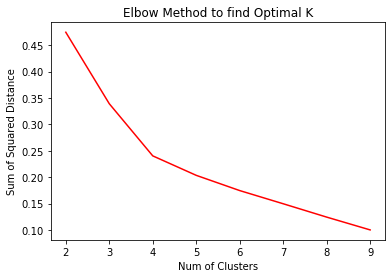

In [78]:
# plt.plot(range(1,Ks), sum_sqrd_dist, 'bx-')
plt.plot(range(2,Ks), sum_sqrd_dist, color='r')
plt.xlabel("Num of Clusters")
plt.ylabel("Sum of Squared Distance")
plt.title("Elbow Method to find Optimal K")
plt.show()

#### Here I'll use **K=4**

#### **First, I'll use "Silhouette Coefficient" to find the optimal value of K**

In [80]:
from sklearn.metrics import silhouette_score

Silh_scores = []
for j in range(2,Ks):
    K_Means2 = KMeans(n_clusters = j, max_iter = 500)
    K_Means2.fit(DownTown_grouped_clus)
    labels_2 = K_Means2.labels_
    
    silh_coeff = silhouette_score(DownTown_grouped_clus, labels_2, metric = 'euclidean')
    Silh_scores.append(silh_coeff)
    print("Where num of clusters = {}, the Silhouette Coefficient is {}".format(j, silh_coeff))

Where num of clusters = 2, the Silhouette Coefficient is 0.6225353775165242
Where num of clusters = 3, the Silhouette Coefficient is 0.46601255060272423
Where num of clusters = 4, the Silhouette Coefficient is 0.4177072486570973
Where num of clusters = 5, the Silhouette Coefficient is 0.17680660200435683
Where num of clusters = 6, the Silhouette Coefficient is 0.03664737274800728
Where num of clusters = 7, the Silhouette Coefficient is 0.1361819729519953
Where num of clusters = 8, the Silhouette Coefficient is 0.08234260564514467
Where num of clusters = 9, the Silhouette Coefficient is 0.05595207205289936


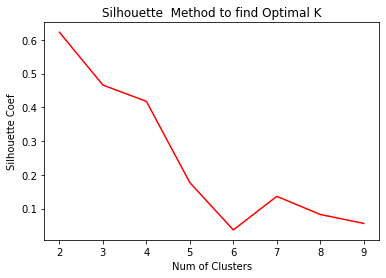

In [81]:
plt.plot(range(2,Ks), Silh_scores, color='r')
plt.xlabel("Num of Clusters")
plt.ylabel("Silhouette Coef")
plt.title("Silhouette  Method to find Optimal K")
plt.show()

#### Here I'll use **K=4**

#### **As I know the value of K, I can proceed for Clustering**

In [84]:
# set number of clusters
kclusters = 4

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(DownTown_grouped_clus)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([3, 3, 2, 3, 3, 3, 0, 3, 3, 3], dtype=int32)

In [ ]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

## It's okay for the error because by mistake I ran twice that means I tried to Append twice

# TorDownT_merged = TorDownT_df

# # merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
# TorDownT_merged = TorDownT_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighbourhood')

# TorDownT_merged.head() # check the last columns!

#### **N.B. -** It's okay for the error because by mistake I ran twice that means I tried to Append twice

In [87]:
TorDownT_merged = TorDownT_df

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
TorDownT_merged = TorDownT_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighbourhood')

TorDownT_merged.head() # check the last columns!

,PostalCode,Latitude,Longitude,Borough,Neighbourhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M4W,43.679563,-79.377529,Downtown Toronto,Rosedale,1,Park,Trail,Playground,Deli / Bodega,Dumpling Restaurant,Donut Shop,Doner Restaurant,Dog Run,Discount Store,Diner
1,M4X,43.667967,-79.367675,Downtown Toronto,"Cabbagetown,St. James Town",3,Coffee Shop,Pizza Place,Italian Restaurant,Restaurant,Café,Bakery,Pub,Chinese Restaurant,Butcher,Indian Restaurant
2,M4Y,43.665860,-79.383160,Downtown Toronto,Church and Wellesley,3,Coffee Shop,Gay Bar,Sushi Restaurant,Japanese Restaurant,Restaurant,Gym,Café,Fast Food Restaurant,Grocery Store,Hotel
3,M5A,43.654260,-79.360636,Downtown Toronto,Harbourfront,3,Coffee Shop,Park,Café,Bakery,Pub,Mexican Restaurant,Restaurant,Cosmetics Shop,Performing Arts Venue,Breakfast Spot
4,M5B,43.657162,-79.378937,Downtown Toronto,"Ryerson,Garden District",3,Coffee Shop,Clothing Store,Cosmetics Shop,Café,Japanese Restaurant,Fast Food Restaurant,Italian Restaurant,Bookstore,Bubble Tea Shop,Ramen Restaurant


In [88]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(TorDownT_merged['Latitude'], TorDownT_merged['Longitude'], TorDownT_merged['Neighbourhood'], TorDownT_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### **Now, let's examine the cluster**

#### **For Cluster 1**

In [94]:
TorDownT_merged.shape[1]

16

In [95]:
list(range(5, TorDownT_merged.shape[1]))

[5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

In [99]:
x=TorDownT_merged.columns.get_loc("Neighbourhood")
x

4

In [100]:
TorDownT_merged.columns[[x] + list(range(5, TorDownT_merged.shape[1]))]

Index(['Neighbourhood', 'Cluster Labels', '1st Most Common Venue',
       '2nd Most Common Venue', '3rd Most Common Venue',
       '4th Most Common Venue', '5th Most Common Venue',
       '6th Most Common Venue', '7th Most Common Venue',
       '8th Most Common Venue', '9th Most Common Venue',
       '10th Most Common Venue'],
      dtype='object')

In [104]:
TorDownT_merged.loc[TorDownT_merged['Cluster Labels'] == 0, TorDownT_merged.columns[[x] + list(range(5, TorDownT_merged.shape[1]))]]

,Neighbourhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
17,Christie,0,Grocery Store,Café,Park,Coffee Shop,Gas Station,Diner,Italian Restaurant,Restaurant,Candy Store,Baby Store


#### **For Cluster 2**

In [103]:
TorDownT_merged.loc[TorDownT_merged['Cluster Labels'] == 1, TorDownT_merged.columns[[x] + list(range(5, TorDownT_merged.shape[1]))]]

,Neighbourhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Rosedale,1,Park,Trail,Playground,Deli / Bodega,Dumpling Restaurant,Donut Shop,Doner Restaurant,Dog Run,Discount Store,Diner


#### **For Cluster 3**



In [105]:
TorDownT_merged.loc[TorDownT_merged['Cluster Labels'] == 2, TorDownT_merged.columns[[x] + list(range(5, TorDownT_merged.shape[1]))]]

,Neighbourhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
14,"CN Tower,Bathurst Quay,Island airport,Harbourf...",2,Airport Service,Airport Lounge,Airport Terminal,Boutique,Sculpture Garden,Boat or Ferry,Harbor / Marina,Bar,Airport Food Court,Airport


#### **For Cluster 4**
    
   

In [107]:
TorDownT_merged.loc[TorDownT_merged['Cluster Labels'] == 3, TorDownT_merged.columns[[x] + list(range(5, TorDownT_merged.shape[1]))]]

,Neighbourhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,"Cabbagetown,St. James Town",3,Coffee Shop,Pizza Place,Italian Restaurant,Restaurant,Café,Bakery,Pub,Chinese Restaurant,Butcher,Indian Restaurant
2,Church and Wellesley,3,Coffee Shop,Gay Bar,Sushi Restaurant,Japanese Restaurant,Restaurant,Gym,Café,Fast Food Restaurant,Grocery Store,Hotel
3,Harbourfront,3,Coffee Shop,Park,Café,Bakery,Pub,Mexican Restaurant,Restaurant,Cosmetics Shop,Performing Arts Venue,Breakfast Spot
4,"Ryerson,Garden District",3,Coffee Shop,Clothing Store,Cosmetics Shop,Café,Japanese Restaurant,Fast Food Restaurant,Italian Restaurant,Bookstore,Bubble Tea Shop,Ramen Restaurant
5,St. James Town,3,Coffee Shop,Café,Restaurant,Breakfast Spot,Cosmetics Shop,Bakery,Italian Restaurant,Cocktail Bar,Clothing Store,Hotel
6,Berczy Park,3,Coffee Shop,Cocktail Bar,Cheese Shop,Bakery,Steakhouse,Seafood Restaurant,Beer Bar,Farmers Market,Café,Breakfast Spot
7,Central Bay Street,3,Coffee Shop,Italian Restaurant,Japanese Restaurant,Café,Ice Cream Shop,Burger Joint,Juice Bar,Sandwich Place,Bar,Spa
8,"Adelaide,King,Richmond",3,Coffee Shop,Steakhouse,Café,Restaurant,Asian Restaurant,Bakery,Bar,Cosmetics Shop,Thai Restaurant,Sushi Restaurant
9,"Harbourfront East,Toronto Islands,Union Station",3,Coffee Shop,Aquarium,Café,Hotel,Italian Restaurant,Scenic Lookout,Fried Chicken Joint,Brewery,Restaurant,Pizza Place
10,"Design Exchange,Toronto Dominion Centre",3,Coffee Shop,Café,Hotel,Restaurant,Steakhouse,Italian Restaurant,Seafood Restaurant,Gastropub,Japanese Restaurant,Bar


## <font color=blue>**Explore and Cluster the Neighbourhood of Toronto -----** <font color=red>**End of Part 3**

## <font color=red>**Thank You**